# Algoritmos básicos de redes neuronales: Adeline

- Fue introducido por Widrow [Widrow and Hoff, 1988], [Widrow and Winter, 1988] entre 1959 y 1988.
- Es de respuesta lineal a diferencia del perceptrón (problemas de regresión)
- Utiliza mínimos cuadrados para el cálculo del error.
- La salida de la neurona es una función afín como sigue

$$y = f(\sum_{j=1}^{n} x_{j}w_{j}+\Omega)$$

- El cambio se basa en el cálculo del gradiente descendiente para los patrones de entrada. Se opera un error cuadrático medio $\Epsilon (\epsilon^2)$. La rela del descendiente busca modificar los valores de forma iterativa mediante la regla del descenso del gradiente, esto es, se deriva el error con respecto a los parámetros y se iguala a cero buscando un mínimo local.

En definitiva, llegamos a la misma regla del perceptron, pero por el camino de la diferenciación, teniendo así una salida continua.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def activacion(x):
  return x
activacion_v = np.vectorize(activacion)

In [6]:
def neurona(ent, pesos, bias):
  neta = np.dot(pesos,ent.T)-bias
  return activacion_v(neta)

In [7]:
def adeline(ents,sals,n,n_patrones=10,max_it=1000,error_max=10**-4):
  #Inicializo los pesos
  pesos = 2*np.random.rand(ents.shape[1])- 1
  bias = 2*np.random.rand(1) - 1

  p = 0
  it = 0
  loss = [] #Error cuadratico medio sum(e^2)/n
  #Condición de parada
  while(p <= n_patrones and it <= max_it):
    it += 1
    error_it = 0
    for ent,t in zip(ents,sals):
      y = neurona(ent,pesos,bias)
      error = t - y[0]
      error_it += error**2
      p+=1

      if error != 0:
        p = 0
        pesos = pesos + n*error*ent
        bias = bias + n*error*(-1)

    error_it /= 2
    loss.append(error_it)
    if(error_it<error_max):
      break

  return pesos,bias,loss

In [11]:
f = lambda e: 2*e[0] - 3.5*e[1] + 4.7*e[2] + 3
ents = np.array([[x,y,z] for x in range(0,10)
                   for y in range(12,22)
                   for z in range(30,50)])

sals = np.array(list(map(f, ents)))
sals.shape

(2000,)

In [12]:
list(zip(ents,sals))[0:20]

[(array([ 0, 12, 30]), 102.0),
 (array([ 0, 12, 31]), 106.70000000000002),
 (array([ 0, 12, 32]), 111.4),
 (array([ 0, 12, 33]), 116.1),
 (array([ 0, 12, 34]), 120.80000000000001),
 (array([ 0, 12, 35]), 125.5),
 (array([ 0, 12, 36]), 130.20000000000002),
 (array([ 0, 12, 37]), 134.9),
 (array([ 0, 12, 38]), 139.6),
 (array([ 0, 12, 39]), 144.3),
 (array([ 0, 12, 40]), 149.0),
 (array([ 0, 12, 41]), 153.70000000000002),
 (array([ 0, 12, 42]), 158.4),
 (array([ 0, 12, 43]), 163.1),
 (array([ 0, 12, 44]), 167.8),
 (array([ 0, 12, 45]), 172.5),
 (array([ 0, 12, 46]), 177.20000000000002),
 (array([ 0, 12, 47]), 181.9),
 (array([ 0, 12, 48]), 186.60000000000002),
 (array([ 0, 12, 49]), 191.3)]

In [13]:
n = 0.001
max_it = 300
p = 2**5
pesos,bias,loss = adeline(ents, sals, n, p, max_it)

In [15]:
pesos,bias

(array([ 2.09115954, -3.42931665,  4.70355699]), array([-1.07348518]))

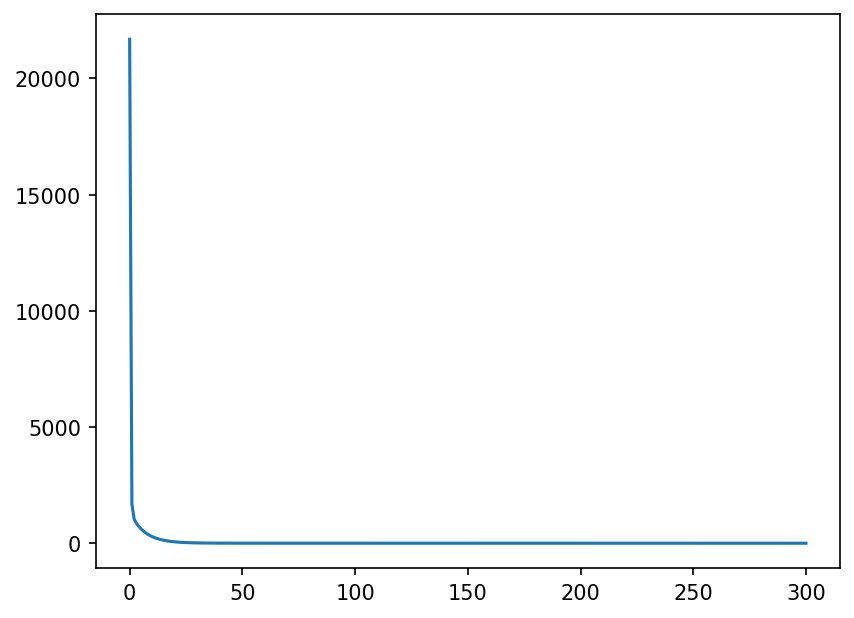

In [17]:
plt.figure(dpi=150)
plt.plot(loss);

In [18]:
min(loss)

2.693495450434282

In [19]:
pred = list(map(lambda x: neurona(x,pesos,bias)[0], ents))

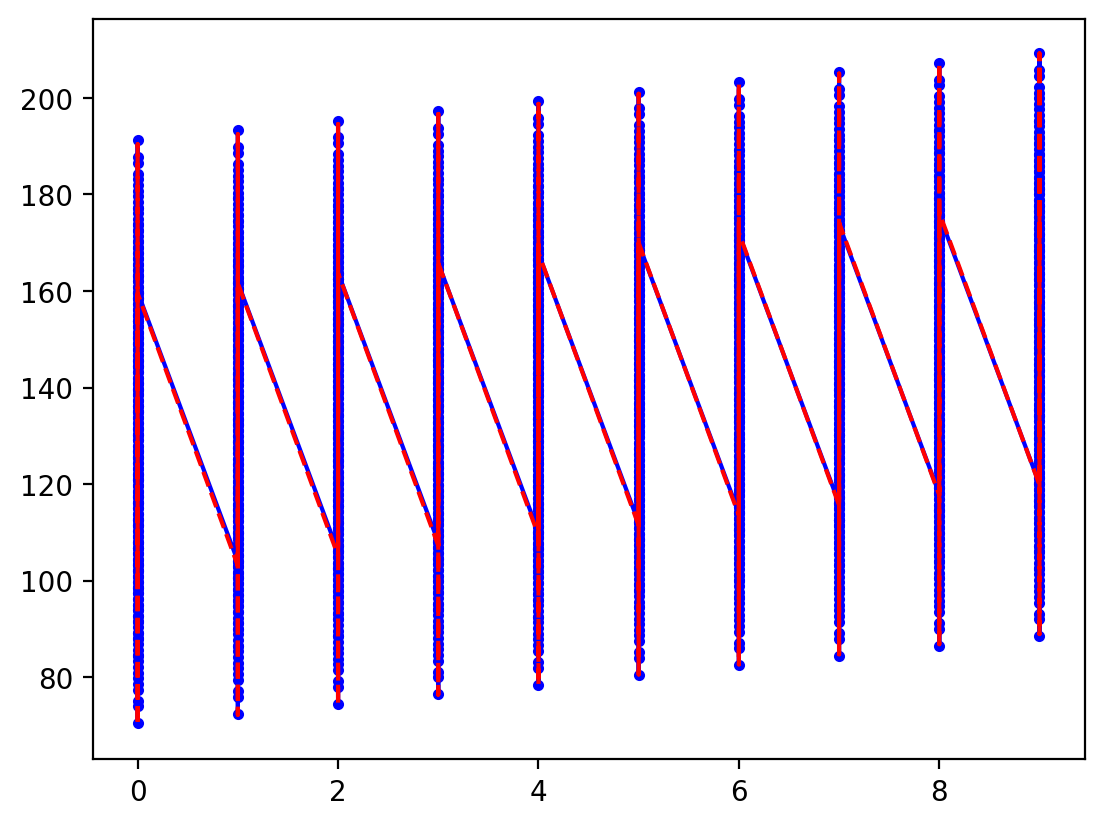

In [20]:
plt.figure(dpi=200)
plt.plot(ents[:,0],sals,"b.-")
plt.plot(ents[:,0],pred,"r--")